### CNN으로 패션 MNIST 분류하기

In [1]:
!pip install tensorflow==2.4.1

이 예제에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다. 예제에서 일반 신경망 모델과 CNN 모델을 각각 학습한 후 정확도를 비교해 보겠습니다.

In [4]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

#### 패션 MNIST 데이터세트 가져오기

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


`load_data()` 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다.

- `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 훈련 세트입니다.
- `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 테스트 세트입니다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. label은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다.

| Label |    Class    |
|:-----:|:-----------:|
|   0   | T-shirt/top |
|   1   |   Trouser   |
|   2   |   Pullover  |
|   3   |    Dress    |
|   4   |     Coat    |
|   5   |    Sandal   |
|   6   |    Shirt    |
|   7   |   Sneaker   |
|   8   |     Bag     |
|   9   |  Ankle boot |

각 이미지는 하나의 label에 매핑되어 있습니다. 데이터세트에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 데이터 탐색

모델을 훈련하기 전에 데이터세트 구조를 살펴봅니다. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다.

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현됩니다.

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

#### 데이터 전처리

모델을 훈련하기 전에 먼저 데이터 전처리를 해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.

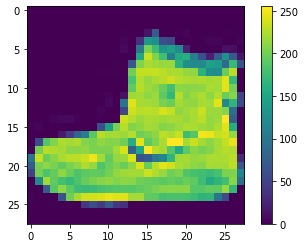

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다.

In [13]:
train_images = train_images / 255.0
test_images= test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 봅니다. 데이터 포맷이 올바른지 확인하고 모델 구성과 훈련할 준비를 마칩니다.

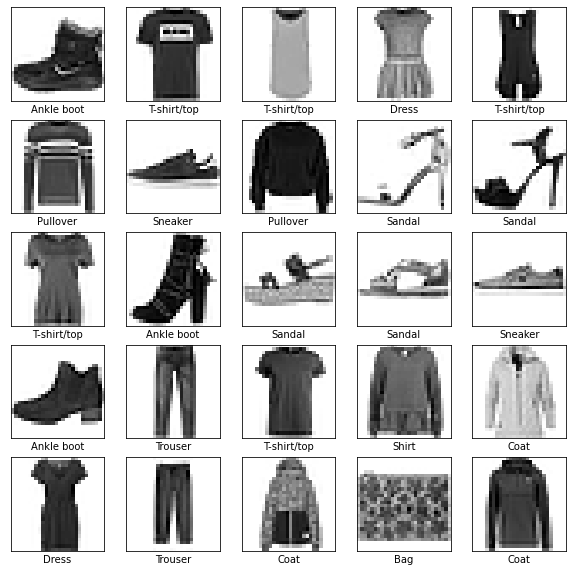

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 일반 신경망 모델 구성

먼저, 일반적인 `Dense` 층으로 이루어진 신경망 모델을 구성해 봅니다.

In [15]:
dense_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
dense_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 모델 훈련

In [17]:
dense_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 796us/step - loss: 0.6453 - accuracy: 0.7762
Epoch 2/5
1875/1875 [==============================] - 2s 841us/step - loss: 0.3889 - accuracy: 0.8603
Epoch 3/5
1875/1875 [==============================] - 1s 793us/step - loss: 0.3379 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 1s 778us/step - loss: 0.3147 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.2929 - accuracy: 0.8920


#### 정확도 평가

그 다음 테스트 세트에서 모델 성능을 평가합니다.

In [18]:
test_loss, test_acc = dense_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3545 - accuracy: 0.8738


In [19]:
print(test_acc)

0.8737999796867371


#### CNN 모델 구성

CNN 모델을 구성하기 전에, CNN 모델의 입력 shape를 맞춰주기 위해서 데이터 세트의 모양을 수정하겠습니다.

In [20]:
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))

그 다음, CNN 모델을 구성하겠습니다.

In [21]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [22]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### CNN 모델 훈련

In [23]:
cnn_model.fit(train_images_cnn, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.6950 - accuracy: 0.7429
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3280 - accuracy: 0.8798
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2637 - accuracy: 0.9035
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2382 - accuracy: 0.9106
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2123 - accuracy: 0.9203


#### CNN 모델 평가

In [24]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images_cnn, test_labels, verbose=2)

313/313 - 2s - loss: 0.2778 - accuracy: 0.9056


In [25]:
print(test_acc_cnn)

0.9056000113487244


#### 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.

In [26]:
predictions = cnn_model.predict(test_images_cnn)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 봅니다.

In [27]:
predictions[0]

array([4.0738262e-09, 7.0325528e-09, 2.4546289e-09, 3.1323988e-10,
       2.0276306e-07, 1.3445924e-05, 3.2294671e-09, 6.2020357e-05,
       1.0484176e-07, 9.9992418e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아봅니다.

In [28]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 봅니다.

In [29]:
test_labels[0]

9

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다.

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

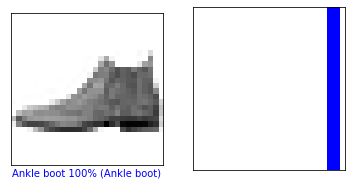

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

이번에는 모델이 틀리게 예측한 예시입니다. 원래 Sneaker의 테스트 이미지를 Sandal로 잘못 예측한 예시입니다.

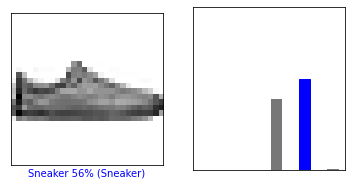

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

더 많은 이미지의 예측을 출력해 보겠습니다. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨간색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

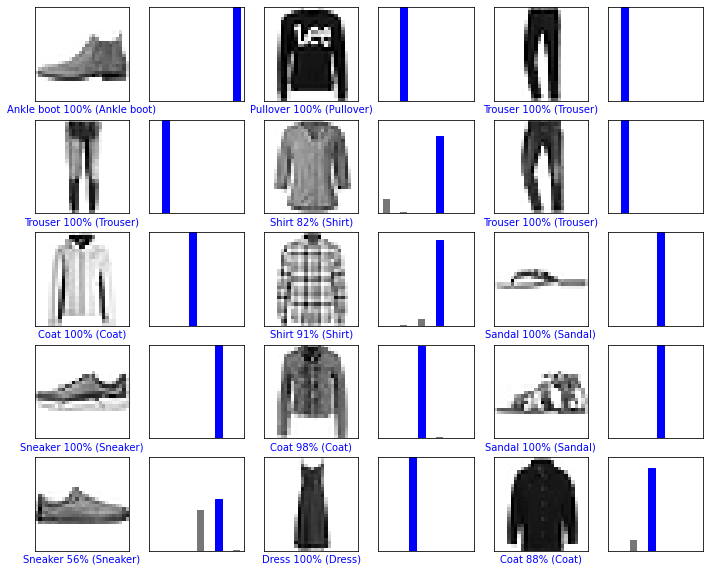

In [33]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [34]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images_cnn[0]

print(img.shape)

(28, 28, 1)


`tf.keras` 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 맨 앞의 차원을 추가해주어야 합니다.

In [35]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


이제 이 이미지의 예측을 만듭니다.

In [36]:
predictions_single = cnn_model.predict(img)

print(predictions_single)

[[4.0738262e-09 7.0325394e-09 2.4546289e-09 3.1323988e-10 2.0276306e-07
  1.3445924e-05 3.2294611e-09 6.2020357e-05 1.0484176e-07 9.9992418e-01]]


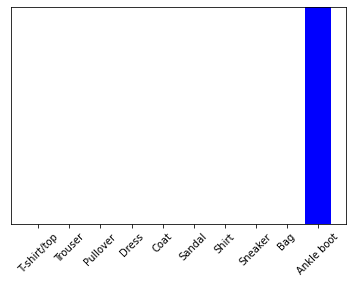

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`cnn_model.predict` 는 2차원 넘파이 배열을 반환하므로 첫 번째 원소의 이미지 예측을 선택합니다.

In [38]:
np.argmax(predictions_single[0])

9

이전과 마찬가지로 모델의 예측은 레이블 9입니다.